In [1]:
import pandas as pd
import numpy as np
import seaborn as sns     
import matplotlib.pyplot as plt
%matplotlib inline        

In [2]:
religiousMotifs = pd.read_csv("WDB_ReligiousMotif.csv")
meetingPlaces = pd.read_csv("WDB_WitchesMeetingPlace.csv")
demonicPacts = pd.read_csv("WDB_DemonicPact.csv")

accuseds = pd.read_csv("WDB_Accused.csv")
ritualObjects = pd.read_csv("WDB_RitualObject.csv")
cases = pd.read_csv("WDB_Case.csv")

In [3]:
religiousMotifs.drop(['MotifSystemId', 'Createdby',
'MotifID', 'Createdate',
'Lastupdatedby', 'Lastupdatedon'], axis=1, inplace = True)

In [4]:
demonicPacts.drop(['DemonicSystemId', 'Createdby',
'DemonicID', 'Createdate',
'Lastupdatedby', 'Lastupdatedon'], axis=1, inplace = True)

In [5]:
meetingPlaces.drop(['MeetingPlaceSystemId', 'Createdby',
'MeetingPlaceID', 'Createdate',
'Lastupdatedby', 'Lastupdatedon'], axis = 1,inplace = True)

In [6]:
accuseds.drop(['AccusedSystemId', 'Createdby',
'AccusedID', 'Createdate',
'Lastupdatedby', 'Lastupdatedon','Patronymic',
'DesTitle','Age_estcareer',
'Age_estchild','Notes',
'Res_NGR_Northing','Res_NGR_Easting',
'Res_NGR_Letters'], axis=1, inplace = True)

In [7]:
cases = cases[['CaseRef','AccusedRef','CaseStart_date']]

In [9]:
#替换nan -》unknown
accuseds.fillna(value= {'Age': 'Unknown', 'Sex': 'Unknown', 'Res_settlement': 'Unknown','MaritalStatus' :'Unknown'}, inplace=True)

In [10]:
accuseds

,AccusedRef,FirstName,LastName,M_Firstname,M_Surname,Alias,Sex,Age,Res_settlement,Res_parish,Res_presbytery,Res_county,Res_burgh,Ethnic_origin,MaritalStatus,SocioecStatus,Occupation
0,A/EGD/10,Mareon,Quheitt,Marion,White,NaN,Female,Unknown,Sammuelston,P/JO/3539,Haddington,Haddington,NaN,NaN,Unknown,NaN,NaN
1,A/EGD/100,Thom,Cockburn,Thomas,Cockburn,NaN,Male,Unknown,Unknown,NaN,NaN,Haddington,NaN,NaN,Unknown,NaN,NaN
2,A/EGD/1000,Christian,Aitkenhead,Christine,Aikenhead,NaN,Female,Unknown,Rottinraw,NaN,NaN,Dumfries,NaN,NaN,Married,NaN,NaN
3,A/EGD/1001,Janet,Ireland,Janet,Ireland,NaN,Female,Unknown,Rottinraw,NaN,NaN,Dumfries,NaN,NaN,Widowed,NaN,NaN
4,A/EGD/1002,Agnes,Hendersoun,Agnes,Henderson,NaN,Female,Unknown,Unknown,P/ST/1446,Stirling,Stirling,NaN,NaN,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214,A/LA/3240,Cristeane,Johnnestoun,Christine,Johnson,NaN,Female,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
3215,A/LA/3241,Jonet,Curchan,Janet,Curchan,NaN,Female,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
3216,A/LA/3242,James,Chalmer,James,Chalmers,NaN,Male,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN
3217,A/LA/3243,Catherine,Campbell,Katherine,Campbell,NaN,Female,Unknown,Fowlis,P/ST/1168,Forfar,Forfar,NaN,NaN,Unknown,NaN,NaN


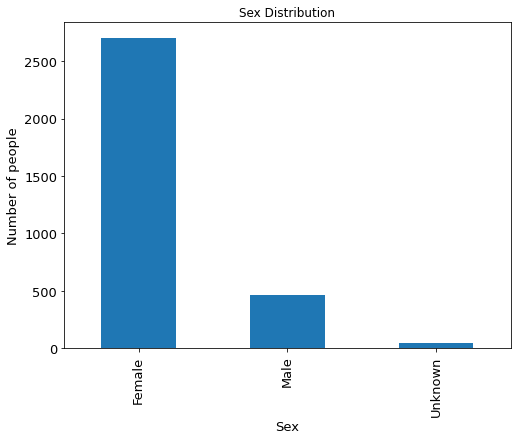

In [87]:
#单纯统计性别，不管年龄是不是unknown
sex_1 = accuseds['Sex'].value_counts().plot.bar()
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.xlabel('Sex',size = 13)
plt.ylabel('Number of people',size = 13)
plt.rcParams['figure.figsize'] = (8.0, 6.0)
sex_1.set_title('Sex Distribution')
plt.show()

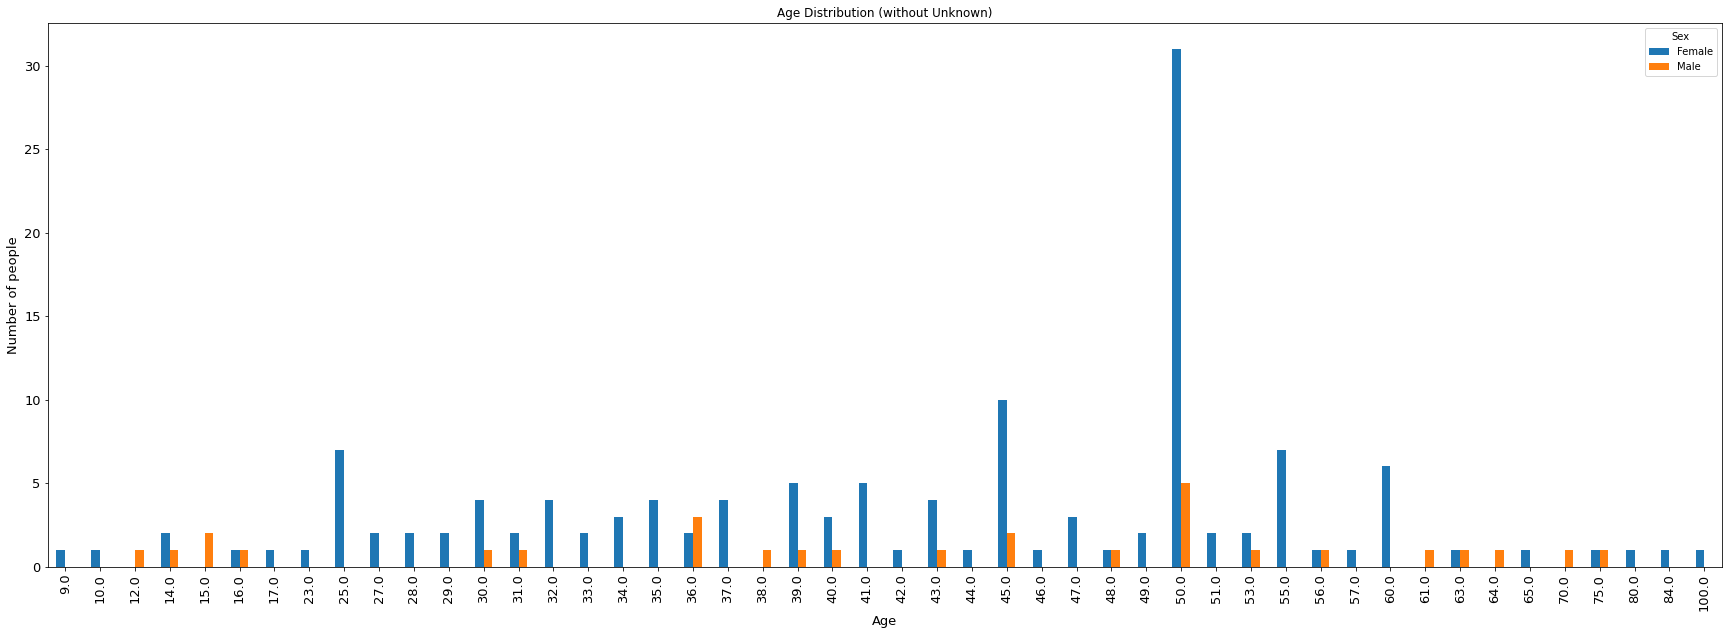

In [97]:
#没有unknown的sex和age分布统计
sex_age_without_unknown = accuseds.loc[(accuseds['Sex'] != 'Unknown') & (accuseds['Age'] != 'Unknown')]
sex_age_without=pd.crosstab(sex_age_without_unknown['Age'],sex_age_without_unknown['Sex'])
sex_age_without_graph = sex_age_without.plot(kind='bar')
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.xlabel('Age',size = 13)
plt.ylabel('Number of people',size = 13)
plt.rcParams['figure.figsize'] = (30.0, 10.0)
sex_age_without_graph.set_title('Age Distribution (without Unknown)')
plt.show()
#sex_age=pd.crosstab(accuseds['Age'],accuseds['Sex'])
#sex_age.plot(kind='bar')

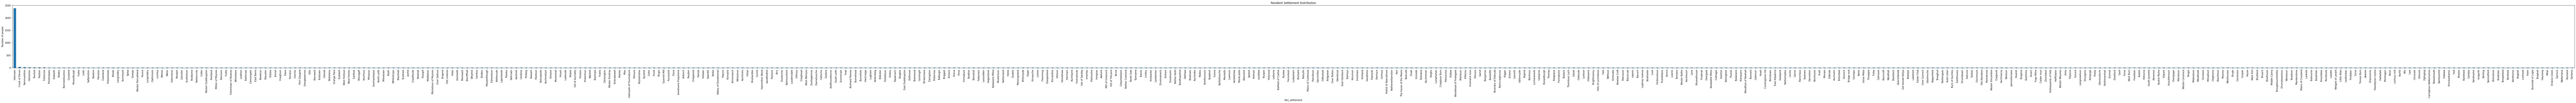

In [99]:
#单纯统计Res_settlement
settlement_graph = accuseds['Res_settlement'].value_counts().plot.bar()
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.xlabel('Res_settlement',size = 10)
plt.ylabel('Number of people',size = 10)
plt.rcParams['figure.figsize'] = (200.0, 5.0)
settlement_graph.set_title('Resident Settlement Distribution')
plt.show()

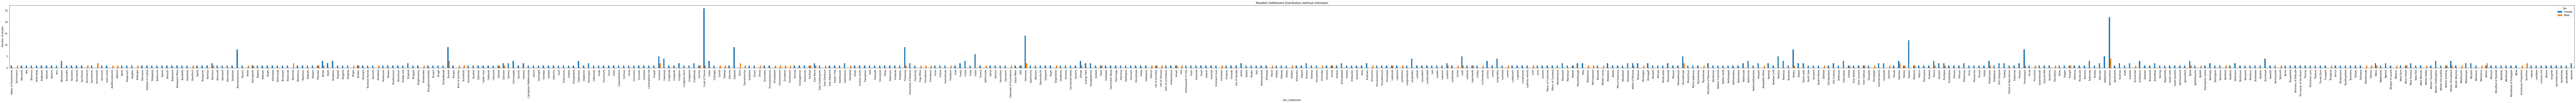

In [102]:
#Res_settlement without unknown & sex without unknown
Res_settlement_without_unknown = accuseds.loc[(accuseds['Res_settlement'] != 'Unknown') & (accuseds['Sex']!='Unknown')]
Res_settlement_without_unknown_graph=pd.crosstab(Res_settlement_without_unknown['Res_settlement'],Res_settlement_without_unknown['Sex'])
abc = Res_settlement_without_unknown_graph.plot(kind='bar')
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.xlabel('Res_settlement',size = 10)
plt.ylabel('Number of people',size = 10)
plt.rcParams['figure.figsize'] = (200.0, 5.0)
abc.set_title('Resident Settlement Distribution (without Unknown)')
plt.show()

In [78]:
accuseds['MaritalStatus'].value_counts()

Unknown            2485
Married             575
Widowed             140
Single               16
Irregular union       2
/                     1
Name: MaritalStatus, dtype: int64

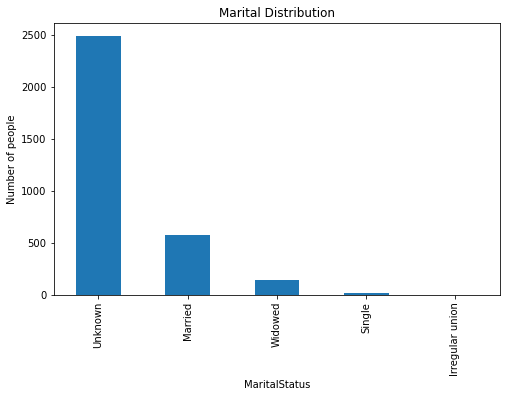

In [109]:
#Status MaritalStatus
marry = accuseds[(accuseds['MaritalStatus']!='/')]
marry_graph = marry['MaritalStatus'].value_counts().plot.bar()
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.xlabel('MaritalStatus',size = 10)
plt.ylabel('Number of people',size = 10)
plt.rcParams['figure.figsize'] = (8.0, 5.0)
marry_graph.set_title('Marital Distribution')
plt.show()

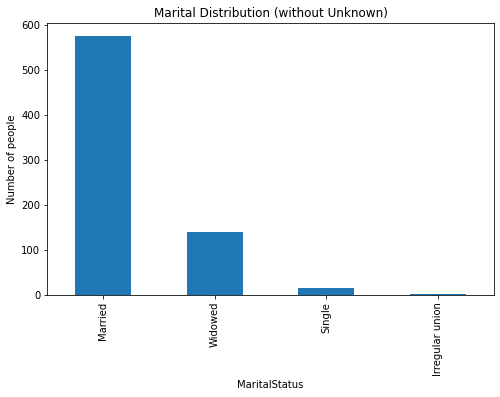

In [110]:
#Status MaritalStatus
marry = accuseds[(accuseds['MaritalStatus']!='/')&(accuseds['MaritalStatus']!='Unknown')]
marry_graph = marry['MaritalStatus'].value_counts().plot.bar()
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.xlabel('MaritalStatus',size = 10)
plt.ylabel('Number of people',size = 10)
plt.rcParams['figure.figsize'] = (8.0, 5.0)
marry_graph.set_title('Marital Distribution (without Unknown)')
plt.show()

In [80]:
ritualObjects_accuseds = ritualObjects[['RitualObjectRef','RitualObjectID','CaseRef','RitualObject_Type']]

In [81]:
#combine ritualObjects_accuseds (only have ritualObjects now) and Cases
ritualObjects_accuseds = ritualObjects_accuseds.merge(cases,left_on="CaseRef",right_on="CaseRef",suffixes = (False, False))

In [82]:
#combine ritualObjects_accuseds (have ritualObjects & Case) and Accuseds
ritualObjects_accuseds = ritualObjects_accuseds.merge(accuseds,left_on="AccusedRef",right_on="AccusedRef",suffixes = (False, False))

In [83]:
ritualObjects_accuseds.describe(include = ["object"])

,RitualObjectRef,CaseRef,RitualObject_Type,AccusedRef,CaseStart_date,FirstName,LastName,M_Firstname,M_Surname,Alias,...,Age,Res_settlement,Res_parish,Res_presbytery,Res_county,Res_burgh,Ethnic_origin,MaritalStatus,SocioecStatus,Occupation
count,632,632,632,632,601,632,632,620,621,76,...,632,632,371,452,620,42,11,632,168,83
unique,632,222,128,222,147,84,200,44,177,27,...,38,75,85,44,27,11,4,5,6,11
top,RO/JO/547,C/EGD/63,Water,A/EGD/52,19/3/1697,Margaret,Stewart,Janet,Stewart,Scudder,...,Unknown,Unknown,P/ST/826,Aberdeen,Renfrew,Stirling,Gael,Unknown,Middling,Vagabond
freq,1,13,60,13,54,56,18,72,21,9,...,454,388,24,54,108,9,4,374,90,26


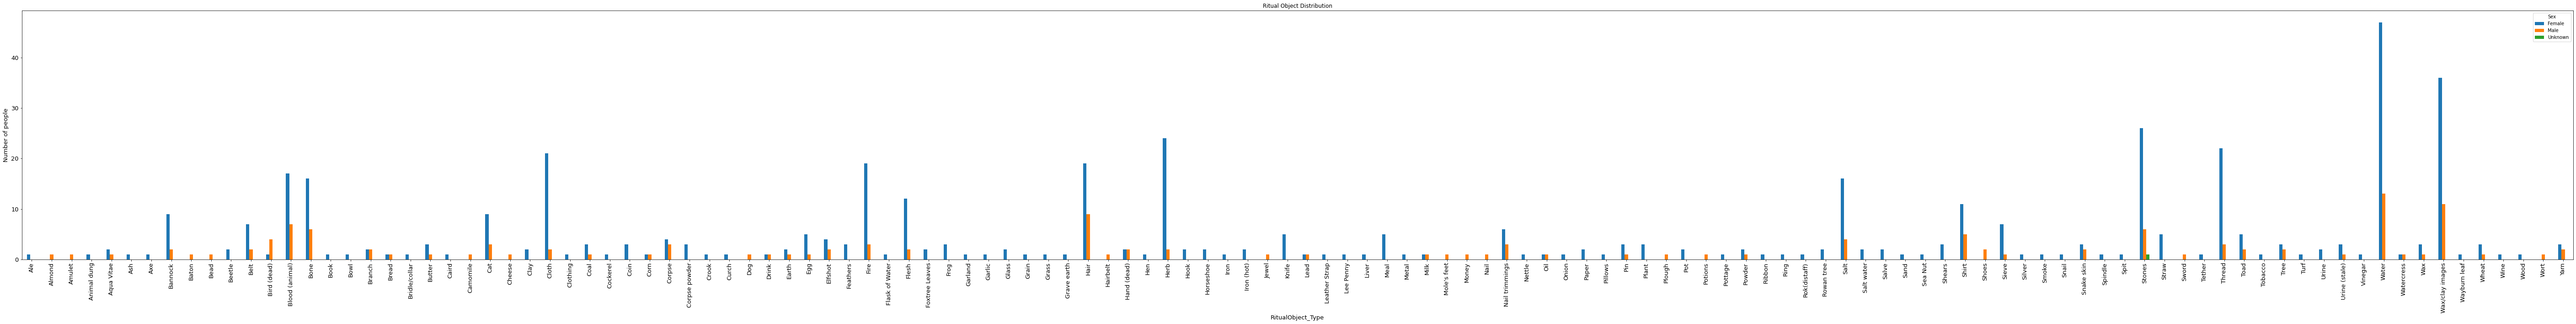

In [112]:
#ritual object and sex(include unknown)
ritualObjects_accuseds_graph=pd.crosstab(ritualObjects_accuseds['RitualObject_Type'],ritualObjects_accuseds['Sex'])
ro1 = ritualObjects_accuseds_graph.plot(kind='bar')
plt.yticks(size = 13)
plt.xticks(size = 13)
plt.xlabel('RitualObject_Type',size = 13)
plt.ylabel('Number of people',size = 13)
plt.rcParams['figure.figsize'] = (100.0, 10.0)
ro1.set_title('Ritual Object Distribution')
plt.show()

In [ ]:
#combine ritualObjects_accuseds (have ritualObjects & Case & accused) and MeetingPlace
ritualObjects_M = ritualObjects_accuseds.merge(meetingPlaces,left_on="CaseRef",right_on="CaseRef",suffixes = (False, False))

In [ ]:
#combine ritualObjects_accuseds (have ritualObjects & Case & accused) and religiousMotifs
ritualObjects_R = ritualObjects_accuseds.merge(religiousMotifs,left_on="CaseRef",right_on="CaseRef",suffixes = (False, False))

In [ ]:
#combine ritualObjects_accuseds (have ritualObjects & Case & accused) and demonicPacts
ritualObjects_D = ritualObjects_accuseds.merge(demonicPacts,left_on="CaseRef",right_on="CaseRef",suffixes = (False, False))